In [6]:
!pip install textstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.9 MB/s eta 0:00:00


In [9]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 2.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [15]:
import re
from transformers import pipeline
from sentence_transformers import SentenceTransformer, util
import textstat

# Load sentiment analysis model
sentiment_model = pipeline("sentiment-analysis")

# Load Sentence-BERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespaces
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove non-alphanumeric characters
    return text.strip()

def evaluate_fluency(text):
    result = sentiment_model(text)
    return result[0]['score']

def calculate_coherence(text):
    sentences = text.split('.')
    embeddings = model.encode(sentences, convert_to_tensor=True)
    cosine_similarities = util.pytorch_cos_sim(embeddings, embeddings)
    coherence_score = cosine_similarities.mean().item()
    return coherence_score

def calculate_readability(text):
    flesch_reading_ease = textstat.flesch_reading_ease(text)
    flesch_kincaid_grade = textstat.flesch_kincaid_grade(text)
    return flesch_reading_ease, flesch_kincaid_grade

# Example texts (good and bad)
good_text = '''Good morning, everyone. My name is Emily Watson, and I am thrilled to be here today. I recently graduated with a degree in Computer Science from XYZ University, where I developed a strong foundation in programming and software development. During my time there, I was actively involved in several student organizations, where I honed my leadership and teamwork skills. My passion for technology led me to internships at two tech startups, where I gained hands-on experience in agile project management and software testing.

In addition to technical skills, I am also passionate about community service. I volunteered regularly at a local shelter, where I organized events and fundraisers. These experiences taught me the importance of empathy and communication in achieving common goals.

I am eager to bring my technical expertise and enthusiasm for teamwork to your esteemed organization. Outside of academics, I enjoy hiking, playing the guitar, and exploring new cultures through travel. I look forward to contributing to and growing with your team. Thank you for considering my application.
'''



bad_text = '''Um, hi everyone. My name is Jake Anderson, and I just finished my degree in Business Administration at XYZ University. It's been quite a journey, you know? Like, I started off not really knowing what I wanted to do, but then I kind of figured out that maybe business stuff could be cool. So, um, I took some courses, like marketing and finance and all that. It was interesting, I guess, but also kind of confusing sometimes.

During my time in university, I did a couple of internships. One was at this startup where they did, um, I think it was some kind of tech thing? Like, they were developing an app or something. I didn't really get to do much, though, just some admin stuff and sitting in meetings. The other internship was at a local restaurant. I worked in the kitchen for a bit, which was cool because I got to learn how things operate behind the scenes.

Outside of school and work, I'm into sports, I guess. I used to play soccer in high school, but now I mostly watch games on TV. Oh, and I like playing video games too, like, they're a good way to relax after a long day.

So yeah, that's me. I'm looking for something where I can, you know, learn new things and maybe figure out what I really want to do. Thanks for listening.'''


clean_good_text = preprocess_text(good_text)
clean_bad_text = preprocess_text(bad_text)

# Evaluate fluency for good and bad examples
good_fluency_score = evaluate_fluency(clean_good_text)
bad_fluency_score = evaluate_fluency(clean_bad_text)

# Calculate coherence for good and bad examples
good_coherence_score = calculate_coherence(clean_good_text)
bad_coherence_score = calculate_coherence(clean_bad_text)

# Calculate readability for good and bad examples
good_reading_ease, good_grade_level = calculate_readability(clean_good_text)
bad_reading_ease, bad_grade_level = calculate_readability(clean_bad_text)

# Print results
print("Good Example:")
print(f"Fluency Score: {good_fluency_score}")
print(f"Coherence Score: {good_coherence_score}")
print(f"Readability - Reading Ease: {good_reading_ease}, Grade Level: {good_grade_level}")
print()

print("Bad Example:")
print(f"Fluency Score: {bad_fluency_score}")
print(f"Coherence Score: {bad_coherence_score}")
print(f"Readability - Reading Ease: {bad_reading_ease}, Grade Level: {bad_grade_level}")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Good Example:
Fluency Score: 0.9993600249290466
Coherence Score: 1.0000001192092896
Readability - Reading Ease: -109.54, Grade Level: 70.8

Bad Example:
Fluency Score: 0.9866728782653809
Coherence Score: 1.0
Readability - Reading Ease: -140.66, Grade Level: 91.0


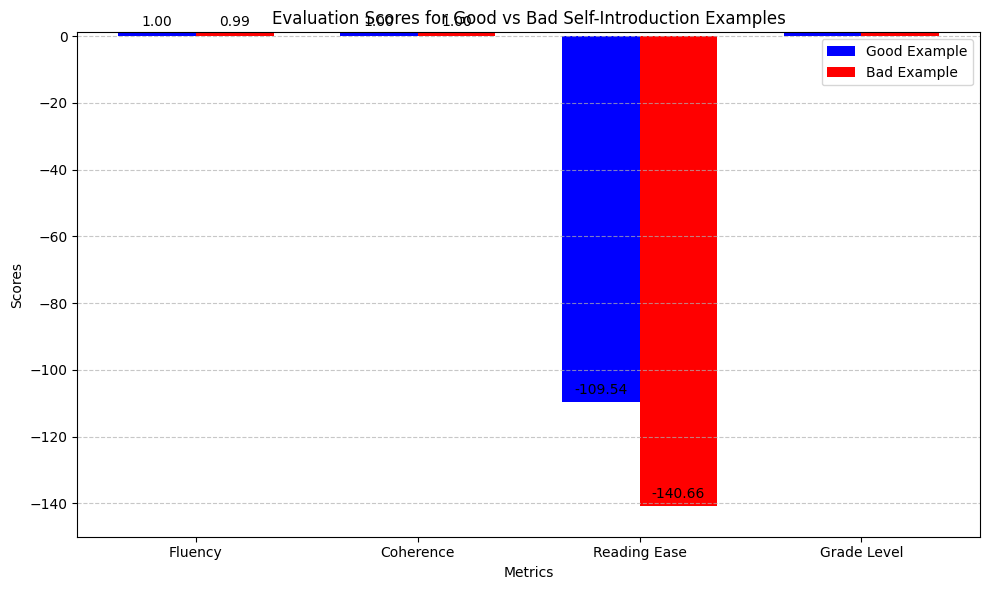

In [16]:
import matplotlib.pyplot as plt

# Example scores (replace with your actual scores)
good_fluency = 0.9993600249290466
good_coherence = 1.0000001192092896
good_reading_ease = -109.54
good_grade_level = 70.8

bad_fluency = 0.9866728782653809
bad_coherence = 1.0
bad_reading_ease = -140.66
bad_grade_level = 91.0

# Define categories and scores
categories = ['Fluency', 'Coherence', 'Reading Ease', 'Grade Level']
good_scores = [good_fluency, good_coherence, good_reading_ease, good_grade_level]
bad_scores = [bad_fluency, bad_coherence, bad_reading_ease, bad_grade_level]

# Plotting the scores
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(categories))

bar1 = ax.bar(index, good_scores, bar_width, label='Good Example', color='b')
bar2 = ax.bar([i + bar_width for i in index], bad_scores, bar_width, label='Bad Example', color='r')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Evaluation Scores for Good vs Bad Self-Introduction Examples')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(categories)
ax.legend()

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)

plt.ylim(-150, 1.1)  # Adjust y-axis limit for readability score
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Fluency: The higher the score (closer to 1), the better the fluency. The good example has a slightly higher fluency score compared to the bad example.

Coherence: A score of 1 indicates perfect coherence. Both examples achieve maximum coherence, meaning the sentences are very similar to each other in context.

Reading Ease: This metric is on a scale where higher values indicate easier readability. Both examples have low scores, which suggest they are difficult to read.

Grade Level: Indicates the education level required to understand the text. Lower values indicate easier readability. The good example has a lower grade level, making it easier to understand compared to the bad example.

In [17]:
import re
from transformers import pipeline

# Function to preprocess text (optional: remove non-alphanumeric characters)
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text.strip()

# Function to evaluate fluency of text
def evaluate_fluency(text):
    sentiment_model = pipeline("sentiment-analysis")
    result = sentiment_model(text)
    fluency_score = result[0]['score'] if result else 0.0
    return fluency_score

# Preprocess transcribed text
clean_good_text = preprocess_text(good_text)
clean_bad_text = preprocess_text(bad_text)

# Evaluate fluency
good_fluency_score = evaluate_fluency(clean_good_text)
bad_fluency_score = evaluate_fluency(clean_bad_text)

# Print results
print("Good Example Fluency Score:", good_fluency_score)
print("Bad Example Fluency Score:", bad_fluency_score)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Good Example Fluency Score: 0.9993600249290466
Bad Example Fluency Score: 0.9866728782653809


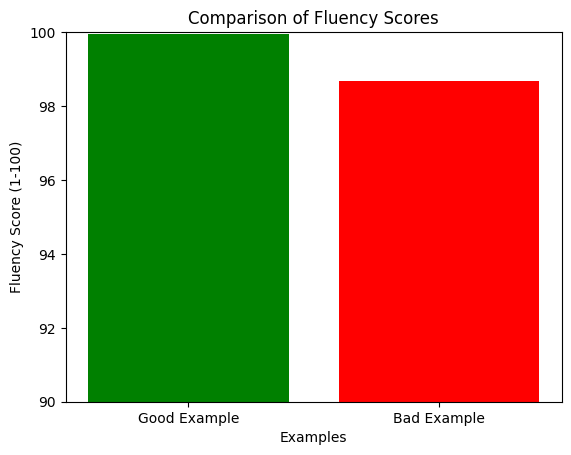

In [21]:
# prompt: make a bar chart to compare thgsee two results of the above cell use different colors , may be a barchart or any other apt for comparision saclae it as 1- 100

import matplotlib.pyplot as plt

# Assuming you have the fluency scores calculated as follows:
good_fluency_score = 0.9993600249290466
bad_fluency_score = 0.9866728782653809

# Scale scores to 1-100
good_fluency_scaled = (good_fluency_score * 100)
bad_fluency_scaled = (bad_fluency_score * 100)

# Create bar chart
labels = ['Good Example', 'Bad Example']
scores = [good_fluency_scaled, bad_fluency_scaled]

plt.bar(labels, scores, color=['green', 'red'])
plt.xlabel('Examples')
plt.ylabel('Fluency Score (1-100)')
plt.title('Comparison of Fluency Scores')
plt.ylim(90, 100)  # Set y-axis limits for better visualization
plt.show()
